In [1]:
!pip install pytrends

In [2]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
trending_topics = TrendReq(hl='en-US', tz=360)


In [3]:
kw_list=["Data Science"]
trending_topics.build_payload(kw_list,cat=0, timeframe='today 12-m')


In [4]:
# Interest over time.
trending_topics.build_payload(kw_list=["Data Science"],
							cat=0, timeframe='today 12-m')
data_iot = trending_topics.interest_over_time()
data_iot = data_iot.sort_values(by="Data Science", ascending = False)
print(data_iot)


            Data Science  isPartial
date                               
2023-03-26           100      False
2022-09-11            97      False
2022-08-21            96      False
2022-09-18            96      False
2022-11-06            92      False
2022-08-28            91      False
2022-10-09            91      False
2022-07-31            90      False
2022-09-25            90      False
2023-05-21            89      False
2022-08-14            89      False
2022-10-30            89      False
2022-09-04            89      False
2023-01-29            89      False
2023-04-30            88      False
2023-01-22            88      False
2023-06-11            88      False
2023-02-19            88      False
2023-01-08            87      False
2023-02-05            87      False
2023-06-04            87      False
2022-08-07            87      False
2023-05-14            86      False
2022-11-13            86      False
2023-03-12            86      False
2023-05-07            86    

In [5]:
data_iot.drop(labels=['isPartial'],axis='columns',inplace=True) 

In [6]:
# Interest by Region
data_ior = trending_topics.interest_by_region()
data_ior = data_ior.sort_values(by="Data Science",
						ascending = False)
print(data_ior)


                          Data Science
geoName                               
Zimbabwe                           100
India                               86
Ethiopia                            77
Kenya                               74
Nigeria                             68
...                                ...
Guyana                               0
Haiti                                0
Heard & McDonald Islands             0
Honduras                             0
Åland Islands                        0

[250 rows x 1 columns]


In [7]:
data_ior.nunique()

Data Science    39
dtype: int64

In [8]:
data_ior.dropna(how='all',axis='columns',inplace=True)
data_ior.isnull().sum()

Data Science    0
dtype: int64

In [9]:
top_20_ior = data_ior.nlargest(20, 'Data Science')


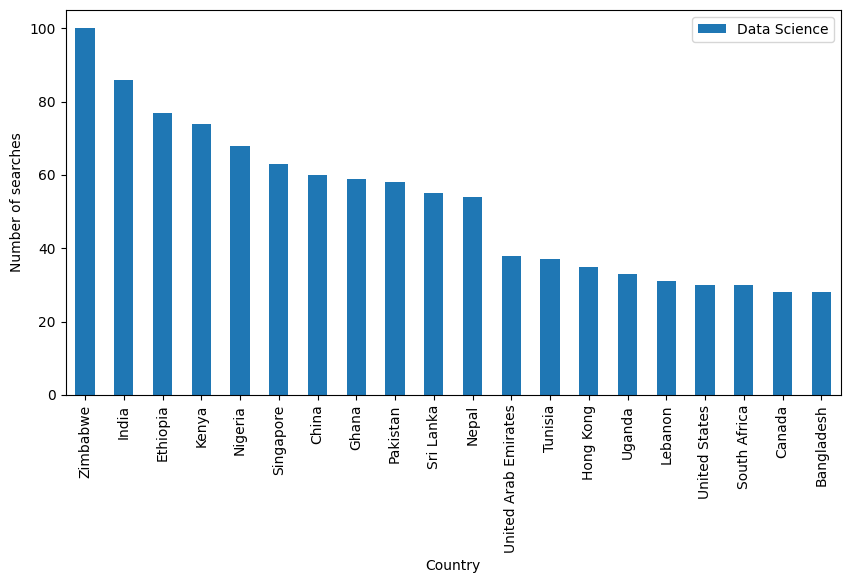

In [10]:
top_20_ior.reset_index().plot(x='geoName', y='Data Science',
						figsize=(10,5), kind="bar")
plt.style.use('fivethirtyeight')
plt.xlabel("Country")
plt.ylabel("Number of searches")
plt.show()


In [11]:
# Top charts.
df_trending_20 = trending_topics.top_charts(2020, hl='en-US',
								tz=300, geo='GLOBAL')
df_trending_20.head(10)


,title,exploreQuery
0,Coronavirus,
1,Election results,
2,Kobe Bryant,
3,Zoom,
4,IPL,
5,India vs New Zealand,
6,Coronavirus update,
7,Coronavirus symptoms,
8,Joe Biden,
9,Google Classroom,


In [12]:
# Top charts.
df_trending_21 = trending_topics.top_charts(2021, hl='en-US',
								tz=300, geo='GLOBAL')
df_trending_21.head(10)


,title,exploreQuery
0,Australia vs India,
1,India vs England,
2,IPL,
3,NBA,
4,Euro 2021,
5,Copa América,Copa America
6,India vs New Zealand,
7,T20 World Cup,
8,Squid Game,
9,DMX,


In [13]:
# Top charts.

df_trending_22 = trending_topics.top_charts(2022, hl='en-US',
								tz=300, geo='GLOBAL')
df_trending_22.head(10)


,title,exploreQuery
0,Wordle,
1,India vs England,
2,Ukraine,
3,Queen Elizabeth,
4,Ind vs SA,
5,World Cup,
6,India vs West Indies,
7,iPhone 14,
8,Jeffrey Dahmer,
9,Indian Premier League,


In [15]:
keywords = trending_topics.suggestions(
keyword='Data Science')
df = pd.DataFrame(keywords)
df.drop(columns= 'mid')


,title,type
0,Data science,Field of study
1,The Soulmate Equation,Book by Christina Lauren
2,Finding the Mother Tree: Discovering the Wisdo...,Book by Suzanne Simard
3,Data Science Academy,Topic
4,Mathematics for Machine Learning,"Book by A. Aldo Faisal, Cheng Soon Ong, and Ma..."


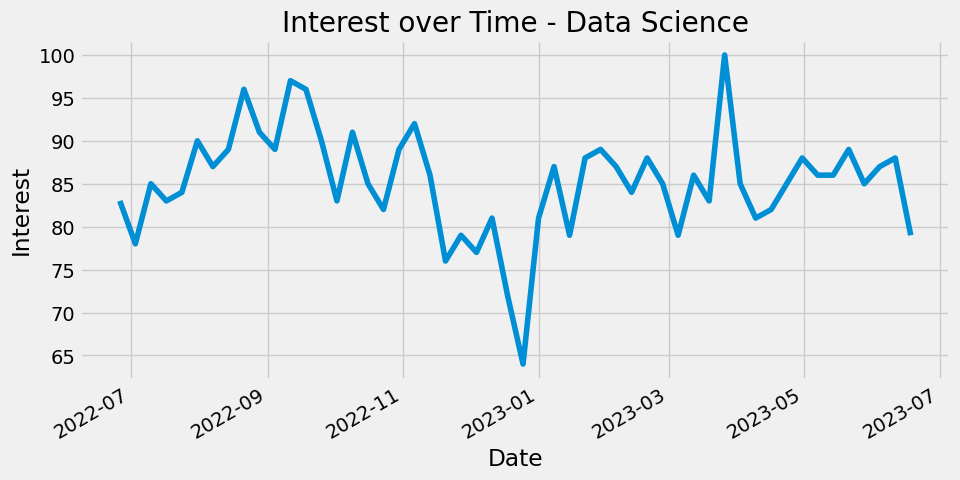

In [16]:
# Plot Interest over Time
plt.figure(figsize=(10, 5))
data_iot["Data Science"].plot()
plt.title("Interest over Time - Data Science")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.show()

<Figure size 1000x500 with 0 Axes>

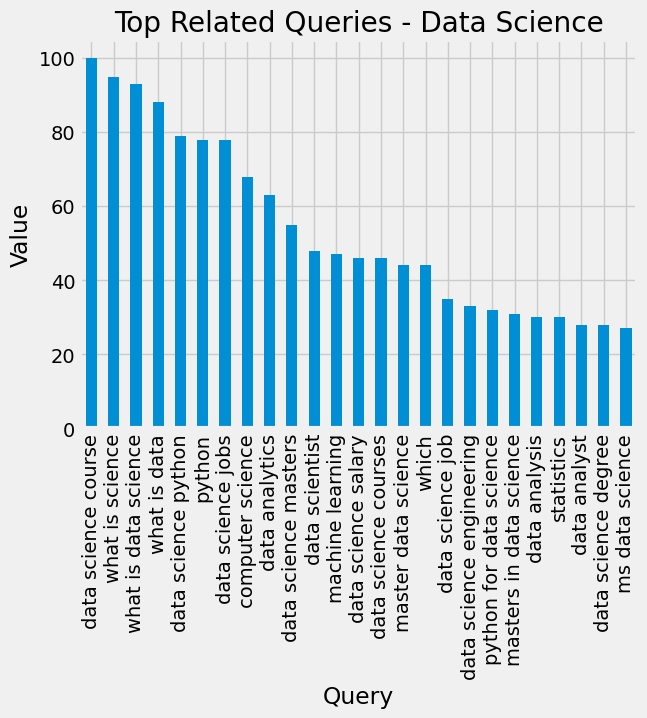

In [19]:
# Retrieve related queries
trending_topics.build_payload(kw_list=['Data Science'])
related_queries = trending_topics.related_queries()
related_queries_dict = next(iter(related_queries.values()))

# Extract top queries and rising queries
top_queries_df = pd.DataFrame(related_queries_dict['top'])
rising_queries_df = pd.DataFrame(related_queries_dict['rising'])

# Visualize top queries
plt.figure(figsize=(10, 5))
top_queries_df.plot(x='query', y='value', kind='bar', legend=False)
plt.title("Top Related Queries - Data Science")
plt.xlabel("Query")
plt.ylabel("Value")
plt.xticks(rotation=90)
plt.show()

<Figure size 1000x500 with 0 Axes>

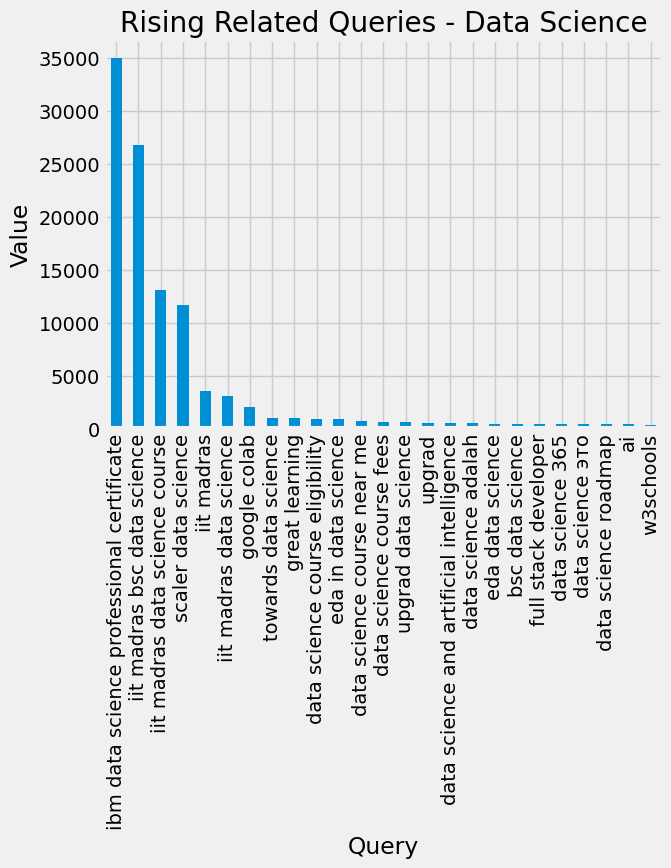

In [21]:
# Visualize rising queries
plt.figure(figsize=(10, 5))
rising_queries_df.plot(x='query', y='value', kind='bar', legend=False)
plt.title("Rising Related Queries - Data Science")
plt.xlabel("Query")
plt.ylabel("Value")
plt.xticks(rotation=90)
plt.show()

<Figure size 1500x1000 with 0 Axes>

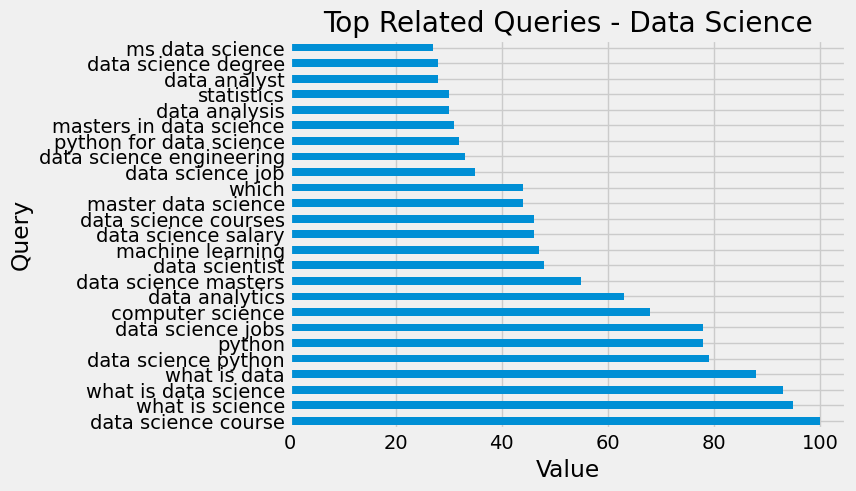

<Figure size 1500x1000 with 0 Axes>

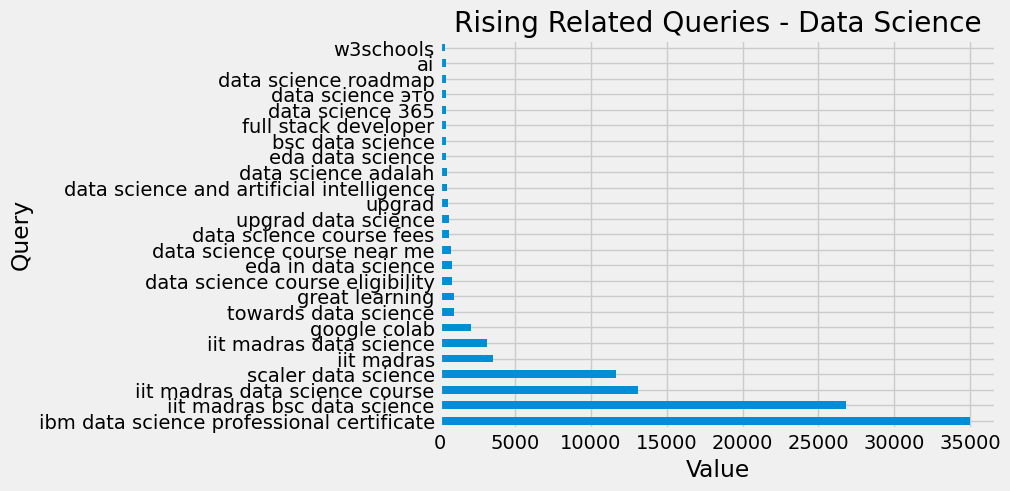

In [23]:
# Visualize top queries
plt.figure(figsize=(15, 10))
top_queries_df.plot(x='query', y='value', kind='barh', legend=False)
plt.title("Top Related Queries - Data Science")
plt.xlabel("Value")
plt.ylabel("Query")
plt.show()

# Visualize rising queries
plt.figure(figsize=(15, 10))
rising_queries_df.plot(x='query', y='value', kind='barh', legend=False)
plt.title("Rising Related Queries - Data Science")
plt.xlabel("Value")
plt.ylabel("Query")
plt.show()
